In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x=np.vstack([(np.random.rand(10,2)*5),(np.random.rand(10,2)*10)])
y=np.hstack([[0]*10,[1]*10])

In [3]:
z=np.zeros((20,2))
for i in range(20):
    z[i,y[i]]=1

In [5]:
wi_1=np.random.rand(3,2)
bi_1=np.random.rand(3)
wi_2=np.random.rand(3,2)
bi_2=np.random.rand(2)

print("weight 1 matrix:\n",wi_1)
print("bias 1 matrix:\n",bi_1)
print("weight 2 matrix:\n",wi_2)
print("bias 2 matrix:\n",bi_2)

weight 1 matrix:
 [[0.13039861 0.74820267]
 [0.74463629 0.71685689]
 [0.1789568  0.17391438]]
bias 1 matrix:
 [0.6568188  0.95730544 0.3457761 ]
weight 2 matrix:
 [[0.4957211  0.54203442]
 [0.20901981 0.44083087]
 [0.62073116 0.38650035]]
bias 2 matrix:
 [0.28696366 0.52997591]


In [6]:
dataSet = pd.DataFrame(x, columns=("x1","x2"))
dataSet["y"]=y
print(dataSet)

          x1        x2  y
0   4.931556  3.844834  0
1   3.579263  3.692631  0
2   2.057331  0.979313  0
3   4.545950  3.853409  0
4   0.967080  0.797018  0
5   0.487472  2.213211  0
6   1.635708  0.507870  0
7   0.160659  2.599425  0
8   0.798914  4.674188  0
9   4.505162  2.779885  0
10  3.146542  2.698094  1
11  8.547763  3.021387  1
12  4.040706  3.266827  1
13  7.169394  5.606163  1
14  9.662420  5.784971  1
15  7.017671  5.005263  1
16  4.126132  2.891522  1
17  2.355350  9.673338  1
18  6.120126  0.251465  1
19  5.118637  5.994089  1


In [7]:
def mlp(z,wi_1,bi_1,wi_2,bi_2):
    m=1/(1+np.exp(-(x.dot(wi_1.T)-bi_1)))
    A=m.dot(wi_2)+bi_2
    expA=np.exp(A)
    yy=expA/expA.sum(axis=1,keepdims=True)
    return yy,m

In [8]:
mlp(x,wi_1,bi_1,wi_2,bi_2)

(array([[0.41643492, 0.58356508],
        [0.41420184, 0.58579816],
        [0.41994501, 0.58005499],
        [0.41584286, 0.58415714],
        [0.42876234, 0.57123766],
        [0.42017865, 0.57982135],
        [0.42623424, 0.57376576],
        [0.41943358, 0.58056642],
        [0.41194485, 0.58805515],
        [0.41478771, 0.58521229],
        [0.41325897, 0.58674103],
        [0.42072082, 0.57927918],
        [0.41448701, 0.58551299],
        [0.42153296, 0.57846704],
        [0.42403342, 0.57596658],
        [0.42073194, 0.57926806],
        [0.41433955, 0.58566045],
        [0.42038416, 0.57961584],
        [0.41694765, 0.58305235],
        [0.41942223, 0.58057777]]),
 array([[0.94598498, 0.99581104, 0.76948958],
        [0.92908701, 0.9873208 , 0.718485  ],
        [0.58520523, 0.78188494, 0.5480299 ],
        [0.94369912, 0.99445951, 0.75729675],
        [0.51639864, 0.5827725 , 0.49147641],
        [0.74320182, 0.72953007, 0.53155042],
        [0.48412148, 0.65130301, 0.5088167

In [19]:
def diff_wi_2(H,Z,Y):
    return H.T.dot(Z-Y)
def diff_wi_1(x,H,Z,output,wi_2):
    dz=(Z-output).dot(wi_2.T)*H*(1-H)
    return x.T.dot(dz)
def diff_bi_2(Z,Y):
    return (Z-Y).sum(axis=0)
def diff_bi_1(Z,Y,wi_2,H):
    return (Z-Y).dot(wi_2.T)*H*(1-H).sum(axis=0)


In [21]:
l_rate=1e-3

for epoch in range(5000):
    output,hidden = mlp(x,wi_1,bi_1,wi_2,bi_2)
    wi_2 =wi_2+l_rate*diff_wi_2(hidden,z,output)
    bi_2 =bi_2+l_rate*diff_bi_2(z,output)
    wi_1 =wi_1+l_rate*diff_wi_1(x,hidden,z,output,wi_2).T
    bi_1 =bi_1+l_rate*diff_bi_1(z,output,wi_2,hidden)
    

In [27]:
x_test = np.array([9,18])

Prediction of class1:  [0.02384972 0.02615026] 
Prediction of class2:  [0.02384972 0.02615026]
Error: x_test and y have different shapes


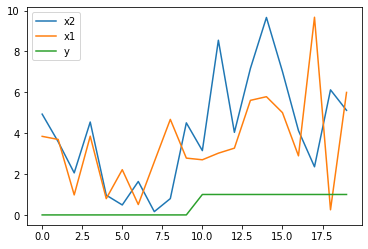

In [30]:
hidden_output = 1/(1+np.exp(-x_test.dot(wi_1.T)-bi_1))
output_output = hidden_output.dot(wi_2)+bi_2
expA=np.exp(output_output)
y=expA/expA.sum()
print("Prediction of class1: ",y[0],"\nPrediction of class2: ",y[1])
plt.plot(dataSet,label="Inline label")
plt.legend(["x2","x1","y"])
if x_test.shape == y.shape:
    plt.scatter(x_test, y, color="red", marker="^")
    plt.show()
else:
    print("Error: x_test and y have different shapes")
